In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

In [35]:
np.random.seed(0)
x = np.linspace(0,10,20)
y = x + 5*np.random.rand(20)

n = 1 : [0.97018804 3.05683393]
n = 2 : [0.0136425  0.83376305 3.2722418 ]
n = 3 : [ 0.0231205  -0.33316506  2.18576814  2.29234233]


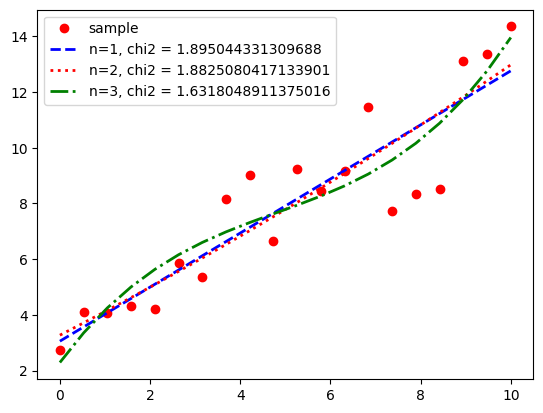

In [36]:
plt.plot(x,y, 'ro', label="sample")
cl = ["b--", "r:", "g-."]
for n in range(1,4):
    c = np.polyfit(x,y,n)
    print("n =", n, ":", c)
    f = np.poly1d(c)
    chi2 = np.mean(np.square(f(x)-y))
    plt.plot(x, f(x), cl[n-1], label=f"n={n}, chi2 = {chi2}", lw=2)
plt.legend()
plt.show()

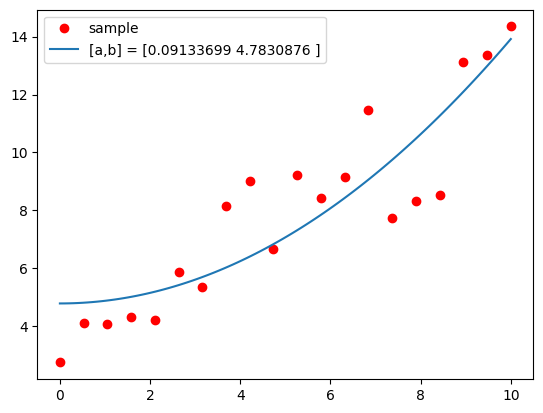

In [37]:
def model(params, x):
    a, b = params[0], params[1]
    return a*x**2 + b
def residual(params, x, y):
    return model(params, x) - y

plt.plot(x,y, 'ro', label="sample")

res = least_squares(residual, [1,1], args=(x,y))
x_fit = np.linspace(0,10,100)
y_fit = model(res.x, x_fit)
plt.plot(x_fit, y_fit, label=f"[a,b] = {res.x}")
plt.legend()
plt.show()

In [38]:
from sklearn import linear_model

回帰係数: 0.9701880386267667
切片: 3.0568339294791524
決定係数: 0.8206229922013442


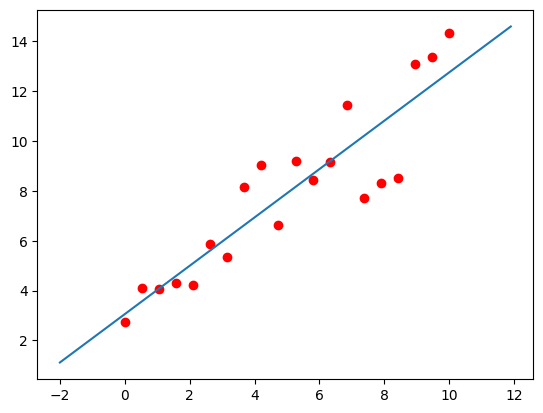

In [39]:
plt.plot(x,y, 'ro', label="sample")

clf = linear_model.LinearRegression()
x2 = np.array([list(x)]).T
clf.fit(x2, y)

a = clf.coef_
b = clf.intercept_
s = clf.score(x2, y)
print(f"回帰係数: {a[0]}")
print(f"切片: {b}")
print(f"決定係数: {s}")
xx = np.arange(-2,12,0.1)
plt.plot(xx, a[0]*xx+b)
plt.show()

In [40]:
#測定データ生成
np.random.seed(0)
t = np.linspace(0,10,20)
x = np.exp(-0.3*t) * np.cos(1.5*t) + 0.1*np.random.rand(20)

In [41]:
#解析モデル
def model(params, t):
    a, gm, om = params[0], params[1], params[2]
    return a * np.exp(-gm*t) * np.cos(om*t)

#モデルとデータの残差
def residual(params, t, x):
    return model(params, t) - x

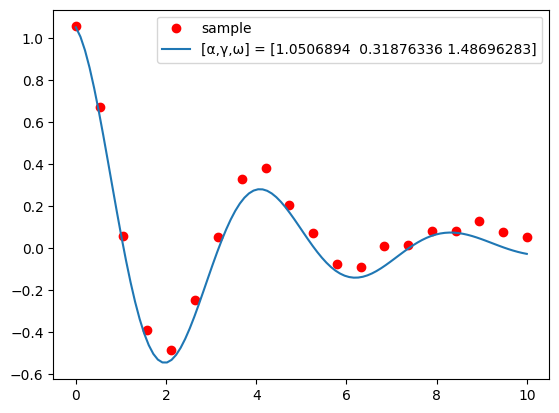

In [42]:
plt.plot(t, x, 'ro', ls='', label='sample')

#初期値1,0.25,1.6でフィット
res = least_squares(residual, [1, 0.25, 1.6], args=(t, x))

t_fit = np.linspace(0, 10, 100)
x_fit = model(res.x, t_fit)
plt.plot(t_fit, x_fit, label=f'[α,γ,ω] = {res.x}')
plt.legend()
plt.show()

In [43]:
#3次式+誤差
#測定データ生成
np.random.seed(0)
x = np.linspace(-10,10,20)
y = 0.1*x**3 + 0.5*x**2 -8*x + 20*np.random.rand(20)

n = 2 : [ 0.5136425  -1.45020564 11.12847812]
n = 3 : [ 0.11156025  0.5136425  -8.82368933 11.12847812]
n = 4 : [ 2.63312016e-03  1.11560252e-01  2.66272999e-01 -8.82368933e+00
  1.38303151e+01]


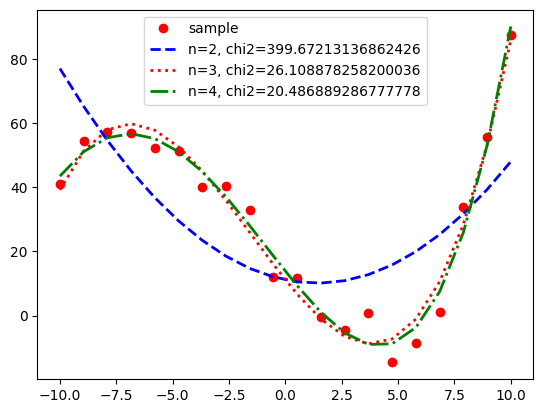

In [44]:
plt.plot(x, y, 'ro', ls='', label = 'sample')
cl = ['b--', 'r:', 'g-.']
for n in range(2, 5):
    c = np.polyfit(x, y, n)
    print('n =', n, ':', c)
    f = np.poly1d(c)
    chi2 = np.mean(np.square(f(x)-y))
    plt.plot(x, f(x), cl[n-2], label=f'n={n}, chi2={chi2}', lw=2)

plt.legend()
plt.show()